In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sb
sb.set_context(
    "talk",
    font_scale=1,
    rc={
        "lines.linewidth": 2.5,
        "text.usetex": True,
        "font.family": 'serif',
        "font.serif": ['Palatino'],
        "font.size": 16
    })
sb.set_style('white')
from matplotlib import rc
# rc('font', **{'family': 'sans-serif', 'sans-serif': ['Helvetica'], 'size': 16})
# ## for Palatino and other serif fonts use:
# rc('font', **{'family': 'serif', 'serif': ['Palatino'], 'size': 16})

font = {'family': 'serif', 'serif': ['Palatino'], 'weight': 'bold', 'size': 16}
rc('font', **font)
rc('text', usetex=True)

In [2]:
filename = 'ps.txt'
sensitivity = pd.read_table(
    filename,
    header=None,
    names=['Dataset', 'R', 'K', 'discount', 'AUC'],
    dtype={
        'Dataset': 'int32',
        'R': 'int32',
        'K': 'int32',
        'discount': 'float64',
        'AUC':'float64'
    })
SNoDups = sensitivity.drop_duplicates()

In [3]:
sR = SNoDups[(SNoDups.K == 50) & (SNoDups.discount==0.5)]
sK = SNoDups[(SNoDups.R == 20) & (SNoDups.discount==0.5)]
sD = SNoDups[(SNoDups.K == 50) & (SNoDups.R == 20)]

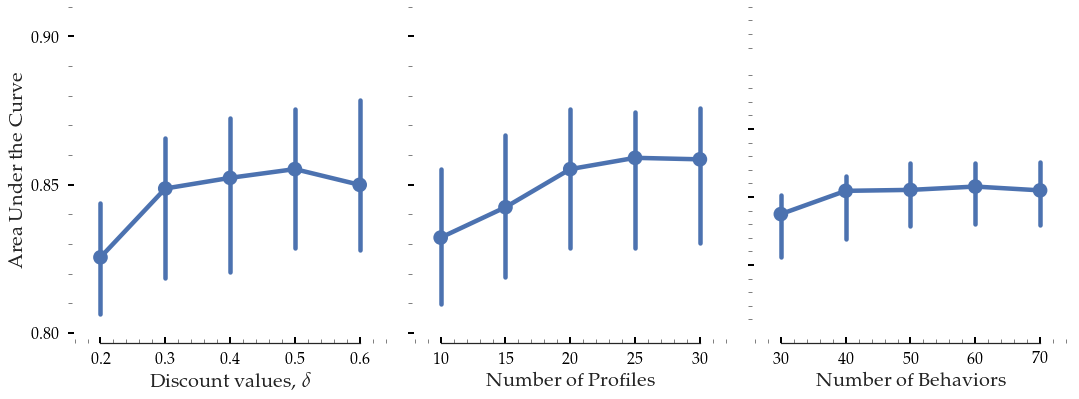

In [4]:
fig, ax = sb.plt.subplots(1, 3, sharey=True, figsize=(18, 6))
fig.subplots_adjust(wspace=0.05, hspace=0.1)

d = [sD, sR, sK]
xvar = ['discount', 'R', 'K']
xlabels = [
    'Discount values, $\delta$', 'Number of Profiles', 'Number of Behaviors'
]

for idx, var in enumerate(xvar):
    ax[idx] = sb.pointplot(
            data=d[idx], x=var, y='AUC', ax=ax[idx], estimator=np.median, ci=95, aspect=1)
    
    
#     ax[idx] = sb.regplot(data=d[idx], x=var, y='AUC', 
#                          ax=ax[idx], 
#                          logx=True, 
#                          order=3,
#                          truncate=True, 
#                          scatter_kws={'color':'gray', 'alpha':'0.5'},
#                          line_kws={'color':'k'}
#                         )



    z = ax[idx]
    z.set_xlabel(r"{0}".format(xlabels[idx]), fontsize=20)
    z.set_ylabel(r"")
    z.set_ylim([0.8, 0.91])
    z.set_yticks(np.arange(0.75, 1, 0.01), minor=True)
#     z.set_xticks(ticks=np.sort((d[idx][var]).unique()))
#     xl = np.sort((d[idx][var]).unique())
#     z.set_xlim([np.min(xl) - np.min(xl) / 4, np.max(xl) + np.min(xl) / 4])   
    z.tick_params(direction='in', length=6, width=2, colors='k', which='major', labelsize=16)
    z.tick_params(
        direction='in', length=4, width=1, colors='gray', which='minor')
    z.set_aspect(aspect='auto', adjustable='box-forced')
    z.minorticks_on()

ax[0].set_ylabel(r"Area Under the Curve", fontsize=20)
sb.despine(offset=10, left=True, trim=True)
fig.savefig('model performance.pdf')
# fig.savefig('model performance-poly3-regression.pdf')

# Showing indiviudal data and the mean

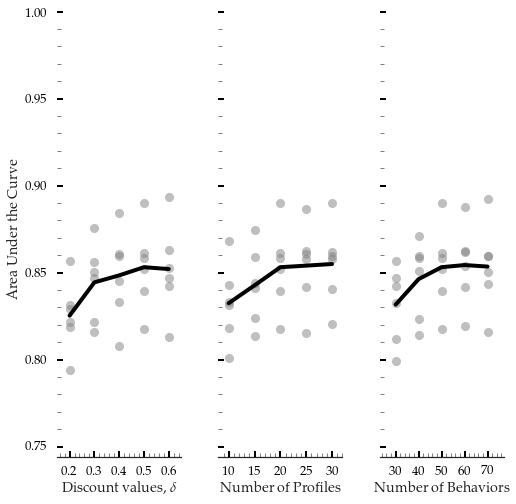

In [5]:
fig, ax = sb.plt.subplots(1, 3, sharey=True, figsize=(8, 8))
fig.subplots_adjust(wspace=0.3, hspace=.1)

d = [sD, sR, sK]
xvar = ['discount', 'R', 'K']
xlabels = [
    'Discount values, $\delta$', 'Number of Profiles', 'Number of Behaviors'
]

for idx, var in enumerate(xvar):

    m = d[idx].groupby(by=var).mean()  # getting the mean value

    ax[idx] = sb.regplot(
        data=d[idx],
        x=var,
        y='AUC',
        ax=ax[idx],
        fit_reg=False,
        scatter_kws={"color": 'gray',
                     "alpha": 0.5})
    ax[idx].plot(
        np.sort((d[idx][var]).unique()), m['AUC'], color='k', linewidth=4)

    z = ax[idx]
    z.set_xlabel(r"{0}".format(xlabels[idx]))
    z.set_ylabel(r"")
    z.set_xticks(ticks=np.sort((d[idx][var]).unique()))
    z.set_ylim([0.75, 1.0])
    z.set_yticks(np.arange(0.75, 1, 0.01), minor=True)
    xl = np.sort((d[idx][var]).unique())
    z.set_xlim([np.min(xl) - np.min(xl) / 4, np.max(xl) + np.min(xl) / 4])
    z.tick_params(direction='in', length=6, width=2, colors='k', which='major')
    z.tick_params(
        direction='in', length=4, width=1, colors='gray', which='minor')
    z.set_aspect(aspect='auto', adjustable='box-forced')
    z.minorticks_on()

ax[0].set_ylabel(r"Area Under the Curve")
sb.despine(offset=10, left=True, trim=False)
fig.savefig('model performance with mean.pdf')

# AUC at varying sparsity levels

In [6]:
filename = 'aucvalues.csv'
AUCquartile = pd.read_csv(filename)
AUCquartile['Method'] =""
methods = list(AUCquartile.columns)
methods = methods[2:6]


In [7]:
# let's stack the data
# create a new data frame
cols = AUCquartile.columns

df = pd.DataFrame(columns=['Dataset', 'Quartile', 'Method', 'AUC'])


for idx, col in enumerate(methods):
    s = AUCquartile[['Dataset', 'Quartile', 'Method', col]]
    s.at[:, 'Method'] = col
    s.columns = ['Dataset', 'Quartile', 'Method', 'AUC']
    df=df.append(s, ignore_index=True)

/Users/Adit/miniconda2/lib/python2.7/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


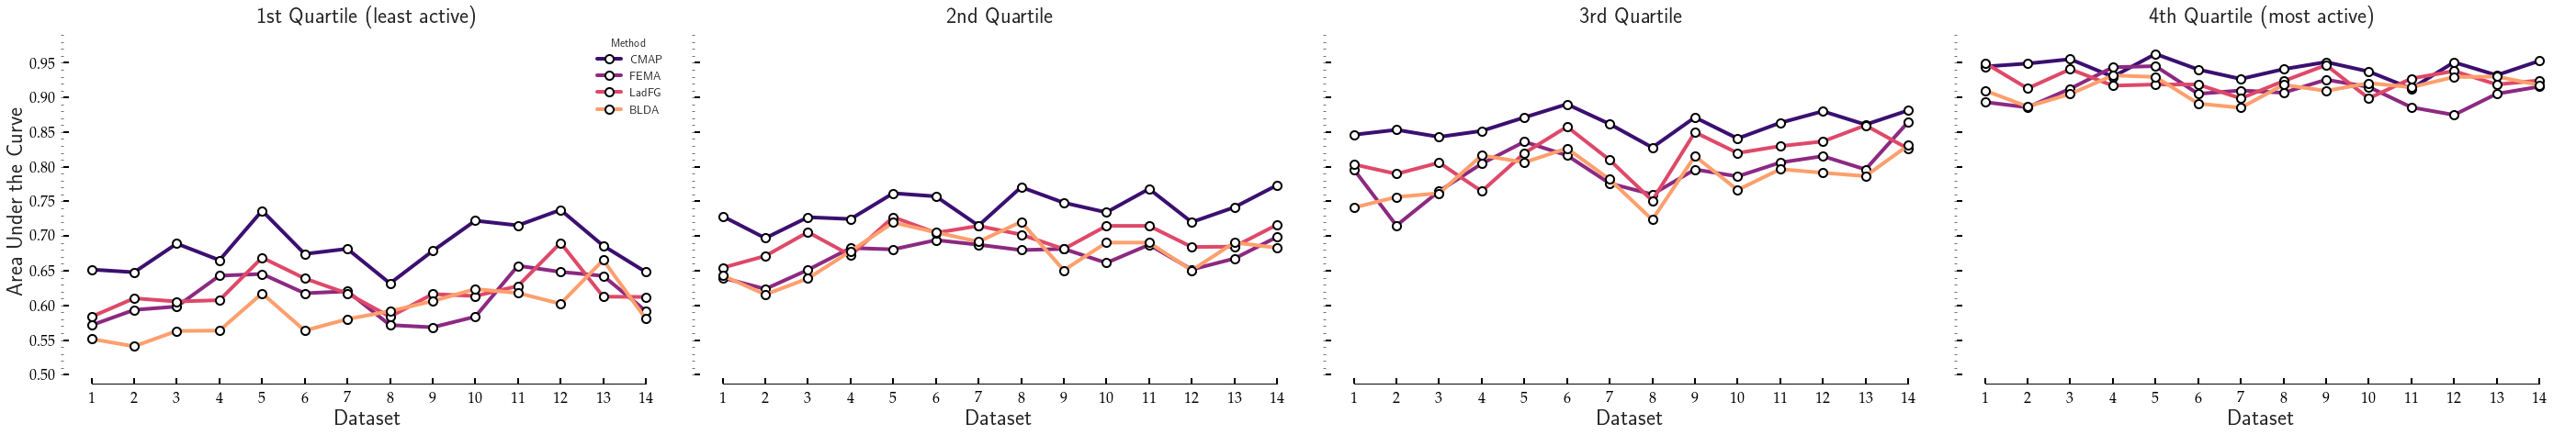

In [8]:
sb.set_style('ticks')
g = sb.FacetGrid(
    df,
    col='Quartile',
    sharey=True,
    hue='Method',
    palette=sb.mpl_palette("magma", 4),  # sequential color palette
    hue_order=methods,
    aspect=1.5,
    legend_out=False,
    size=6.5)
axs = g.axes

g.axes[0, 0].tick_params(
    direction='in', length=6, width=2, colors='k', which='major', labelsize=16)
g.axes[0, 1].tick_params(
    direction='in', length=6, width=2, colors='k', which='major', labelsize=16)
g.axes[0, 2].tick_params(
    direction='in', length=6, width=2, colors='k', which='major', labelsize=16)
g.axes[0, 3].tick_params(
    direction='in', length=6, width=2, colors='k', which='major', labelsize=16)

g.map(
    sb.plt.plot,
    'Dataset',
    'AUC',
    linewidth=4,
    marker='o', # round marker
    mfc='w', # facecolor white
    mec='k', # edge color black
    mew=2).set(
        xticks=np.arange(1, 15), ylim=[0.5, 1], yticks=np.arange(0.5, 1, 0.05))
g.add_legend()

g.axes[0, 0].set_yticks(np.arange(0.5, 1, 0.01), minor=True)
# g.set_axis_labels(y_var="Area Under the Curve")

g.set_xlabels(r"Dataset", fontsize=24)
g.set_ylabels(r"Area Under the Curve", fontsize=24)

# plots to the right are MOOCs
# g.axes[0,0].axvline(x=10.5, color='gray', linestyle=':', linewidth=0.5)
# g.axes[0,1].axvline(x=10.5, color='gray', linestyle='--', linewidth=0.5)
# g.axes[0,2].axvline(x=10.5, color='gray', linestyle='--', linewidth=0.5)
# g.axes[0,3].axvline(x=10.5, color='gray', linestyle='--', linewidth=0.5)

# setting titles individually
g.axes[0, 0].set_title("1st Quartile (least active)", fontsize=24)
g.axes[0, 1].set_title("2nd Quartile", fontsize=24)
g.axes[0, 2].set_title("3rd Quartile", fontsize=24)
g.axes[0, 3].set_title("4th Quartile (most active)", fontsize=24)

g.despine(offset=10, left=True, trim=True)

g.savefig("qpwide.pdf")

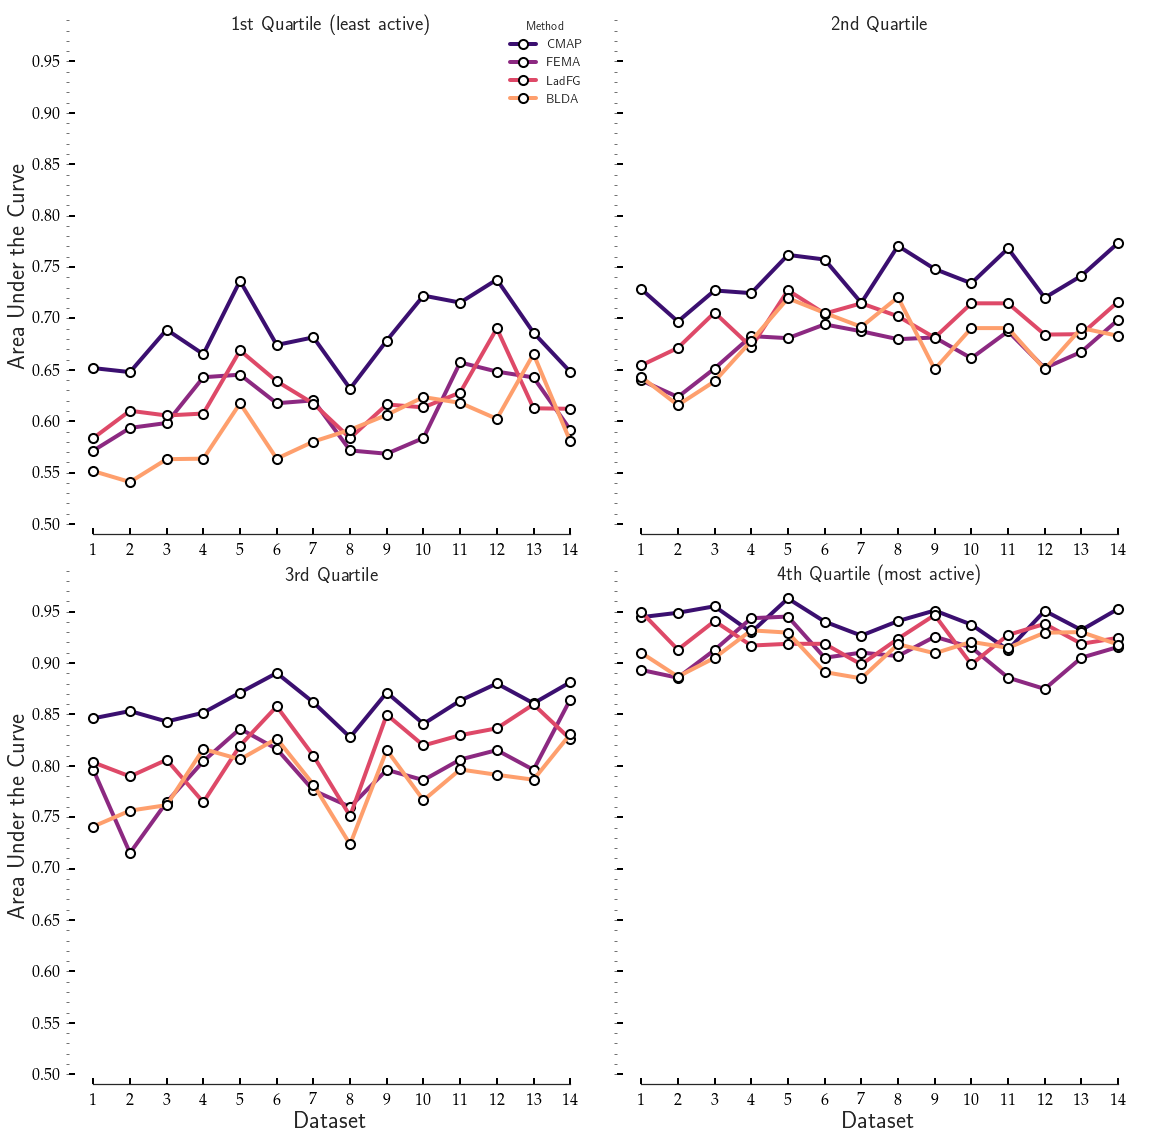

In [9]:
# square format
sb.set_style('ticks')
g = sb.FacetGrid(
    df,
    col='Quartile',
    col_wrap=2,
    sharey=True,
    sharex=True,
    hue='Method',
    palette=sb.mpl_palette("magma", 4),  # sequential color palette
    hue_order=methods,
    aspect=1,
    legend_out=False,
    size=8)
axs = g.axes

g.axes[0].tick_params(
    direction='in', length=6, width=2, colors='k', which='major')
g.axes[1].tick_params(
    direction='in', length=6, width=2, colors='k', which='major')
g.axes[2].tick_params(
    direction='in', length=6, width=2, colors='k', which='major')
g.axes[3].tick_params(
    direction='in', length=6, width=2, colors='k', which='major')

g.map(
    sb.plt.plot,
    'Dataset',
    'AUC',
    linewidth=4,
    marker='o',
    mfc='w',
    mec='k',
    mew=2).set(
        xticks=np.arange(1, 15), ylim=[0.5, 1],
        yticks=np.arange(0.5, 1, 0.05)).add_legend()

g.axes[0].tick_params(
    direction='in', length=6, width=2, colors='k', which='major', labelsize=16)
g.axes[1].tick_params(
    direction='in', length=6, width=2, colors='k', which='major', labelsize=16)
g.axes[2].tick_params(
    direction='in', length=6, width=2, colors='k', which='major', labelsize=16)
g.axes[3].tick_params(
    direction='in', length=6, width=2, colors='k', which='major', labelsize=16)

g.axes[0].set_yticks(np.arange(0.5, 1, 0.01), minor=True)
g.axes[1].set_yticks(np.arange(0.5, 1, 0.01), minor=True)
g.axes[2].set_yticks(np.arange(0.5, 1, 0.01), minor=True)
g.axes[3].set_yticks(np.arange(0.5, 1, 0.01), minor=True)
# g.set_axis_labels(y_var="Area Under the Curve", labelsize=24)
g.set_xlabels(r"Dataset", fontsize=24)
g.set_ylabels(r"Area Under the Curve", fontsize=24)

# plots to the right are MOOCs
# g.axes[0,0].axvline(x=10.5, color='gray', linestyle=':', linewidth=0.5)
# g.axes[0,1].axvline(x=10.5, color='gray', linestyle='--', linewidth=0.5)
# g.axes[0,2].axvline(x=10.5, color='gray', linestyle='--', linewidth=0.5)
# g.axes[0,3].axvline(x=10.5, color='gray', linestyle='--', linewidth=0.5)

# # setting titles individually
g.axes[0].set_title("1st Quartile (least active)", y=0.95, fontsize=20)
g.axes[1].set_title("2nd Quartile", y=0.95, fontsize=20)
g.axes[2].set_title("3rd Quartile", y=0.95, fontsize=20)
g.axes[3].set_title("4th Quartile (most active)", y=0.95, fontsize=20)

g.despine(offset=10, left=True, trim=True)
g.savefig("qpsquare.pdf")

# Runtime and Memory

In [10]:
filename = 't2.txt'
timeanalysis = pd.read_table(
    filename,
    header=None,
    names=['Interactions', 'CMAP', 'LadFG', 'CMAP-P8x', 'FEMA', 'BLDA'],
    dtype={
        'Interactions': 'int32',
        'CMAP': 'float64',
        'LadFG': 'float64',
        'CMAP-P8x': 'float64',
        'FEMA': 'float64',
        'BLDA': 'float64'
    }
)
filename = 'm2.txt'
memanalysis = pd.read_table(
    filename,
    header=None,
    names=['Interactions', 'CMAP', 'LadFG', 'CMAP-P8x', 'FEMA', 'BLDA'],
    dtype={
        'Interactions': 'int32',
        'CMAP': 'float64',
        'LadFG': 'float64',
        'CMAP-P8x': 'float64',
        'FEMA': 'float64',
        'BLDA': 'float64'
    }
)

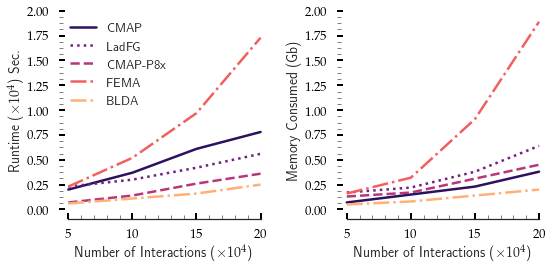

In [11]:
fig, ax = sb.plt.subplots(1, 2, figsize=(8, 4))
fig.subplots_adjust(wspace=0.3, hspace=0.4)
colors = sb.mpl_palette('magma', n_colors=5)

x = timeanalysis['Interactions']

#top subplot
ax[0].plot(
    x, timeanalysis['CMAP'], label='CMAP', color=colors[0], linestyle='solid')
ax[0].plot(
    x,
    timeanalysis['LadFG'],
    label='LadFG',
    color=colors[1],
    linestyle='dotted')
ax[0].plot(
    x,
    timeanalysis['CMAP-P8x'],
    label='CMAP-P8x',
    color=colors[2],
    linestyle='dashed')
ax[0].plot(
    x,
    timeanalysis['FEMA'],
    label='FEMA',
    color=colors[3],
    linestyle='dashdot')
ax[0].plot(
    x,
    timeanalysis['BLDA'],
    label='BLDA',
    color=colors[4],
    linestyle='dashdot')

#right subplot
ax2 = ax[1]
ax2.plot(
    x,
    memanalysis['CMAP'],
    '-',
    label='CMAP',
    color=colors[0],
    linestyle='solid')
ax2.plot(
    x,
    memanalysis['LadFG'],
    label='LadFG',
    color=colors[1],
    linestyle='dotted')
ax2.plot(
    x,
    memanalysis['CMAP-P8x'],
    label='CMAP-P8x',
    color=colors[2],
    linestyle='dashed')
ax2.plot(
    x, memanalysis['FEMA'], label='FEMA', color=colors[3], linestyle='dashdot')
ax2.plot(
    x, memanalysis['BLDA'], label='BLDA', color=colors[4], linestyle='dashdot')

z = ax[0]
z.set_ylabel(r"Runtime ($\times 10^4$) Sec.", fontsize=14)
z.set_xlabel(r"Number of Interactions ($\times 10^4$) ", fontsize=14)

z.set_xticks(x.values, minor=True)
z.set_ylim([0.0, 2.0])
z.set_yticks(np.arange(0, 2, 0.01), minor=True)
z.tick_params(direction='in', length=6, width=2, colors='k', which='major')
z.tick_params(direction='in', length=4, width=1, colors='gray', which='minor')
# z.set_aspect(aspect='auto', adjustable='box-forced')
z.legend()
# z.xaxis.set_visible(False)
z.minorticks_on()

z = ax2
z.set_ylabel(r"Memory Consumed (Gb)", fontsize=14)
z.set_xlabel(r"Number of Interactions ($\times 10^4$) ", fontsize=14)

# plt.xticks(x.values)
z.set_xticks(x.values, minor=True)
z.set_ylim([0.0, 2.0])
z.set_yticks(np.arange(0, 2, 0.01), minor=True)
z.tick_params(direction='in', length=6, width=2, colors='k', which='major')
z.tick_params(direction='in', length=4, width=1, colors='gray', which='minor')
# z.set_aspect(aspect='auto', adjustable='box-forced')

z.minorticks_on()
# ax[0].yaxis.set_visible(False)
sb.despine(left=True, offset=10, trim=True)
sb.plt.tight_layout()

fig.savefig("memtime.pdf")

# Effect of Skew

In [12]:
filename = 'd2.txt'
skew = pd.read_table(
    filename,
    header=None,
    names=['Profile', 'D1', 'D2', 'D3'],
    dtype={
        'Profile': 'int32',
        'D1': 'float64',
        'D2': 'float64',
        'D3': 'float64'
    }
)

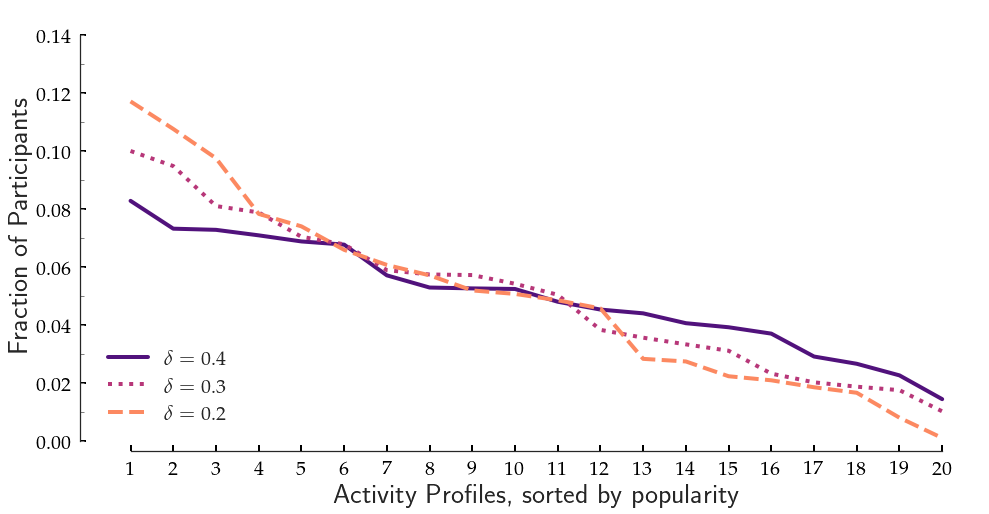

In [13]:
fig, ax = sb.plt.subplots(1, 1, sharex=True, figsize=(16, 8))
# notice the fig size and the font sizes decalared; 
# this is a more horizontal plot; am trying to reduce the height of the plot by changing the aspect ratio

# fig.subplots_adjust(wspace=0, hspace=1)
colors = sb.mpl_palette('magma', n_colors=3)

x = skew['Profile']

#top subplot
ax.plot(
    x,
    skew['D1'],
    label=r'$\delta=0.4$',
    color=colors[0],
    linestyle='solid',
    linewidth=4)
ax.plot(
    x,
    skew['D2'],
    label=r'$\delta=0.3$',
    color=colors[1],
    linestyle='dotted',
    linewidth=4)
ax.plot(
    x,
    skew['D3'],
    label=r'$\delta=0.2$',
    color=colors[2],
    linestyle="dashed",
    linewidth=4)

z = ax
z.set_ylabel(r"Fraction of Participants", fontsize=28)
z.set_xlabel(r"Activity Profiles, sorted by popularity", fontsize=28)

z.set_xticks(x.values, minor=False)
z.set_ylim([0.0, 0.15])
z.set_yticks(np.arange(0, 0.15, 0.01), minor=True)
z.tick_params(
    direction='in', length=6, width=2, colors='k', which='major', labelsize=20)
z.tick_params(direction='in', length=4, width=1, colors='gray', which='minor')
# z.set_aspect(aspect='auto', adjustable='box-forced')
z.legend(loc=3, fontsize=20)
# z.xaxis.set_visible(False)
# z.minorticks_on()

sb.despine(offset=10, trim=True)
fig.savefig("skew.pdf")

# Gibbs

In [14]:
filename = 'conv.csv'
gibbs = pd.read_csv(
    filename,
    header=None,
    names=['Dataset', 'Iterations', 'AUC'],
    dtype={
        'Dataset': 'int32',
        'Iterations': 'float64',
        'AUC': 'float64'
    }
)

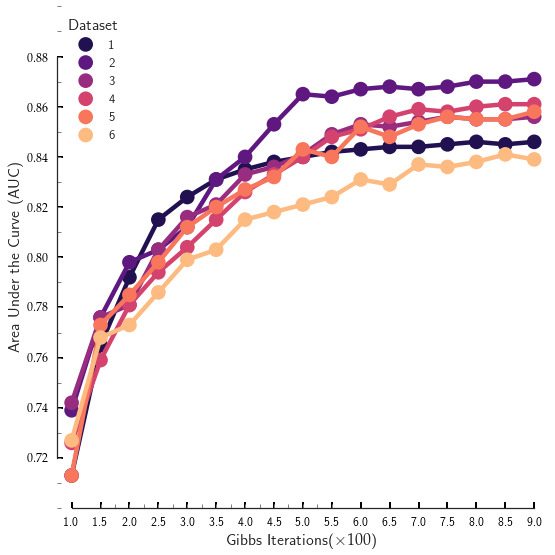

In [15]:
fig, ax = sb.plt.subplots(1, 1, figsize=(8, 8))
colors = sb.mpl_palette('magma', n_colors=6)
x = gibbs['Iterations']

ax = sb.pointplot(
    data=gibbs,
    x='Iterations',
    y='AUC',
    hue='Dataset',
    fit_reg=False,
    legend_out=False,
    palette=colors)
sb.despine(trim=5, left=False)


z = ax
x_max = np.max(np.sort((x).unique()))
x_min = np.min(np.sort((x).unique()))

z.set_ylabel(r"Area Under the Curve (AUC)", fontsize=16)
z.set_xlabel(r"Gibbs Iterations($\times 100$)", fontsize=16)

z.set_xticks(ticks=x.unique(), minor=True)
# z.set_xlim([0, 9.5])

z.set_ylim([0.7, 0.90])
z.set_yticks(np.arange(0.7, 0.90, 0.01), minor=True)
z.tick_params(
    direction='in', length=6, width=2, colors='k', which='major', labelsize=12)
z.tick_params(direction='in', length=4, width=1, colors='gray', which='minor')
z.legend(title='Dataset')

sb.plt.tight_layout()
fig.savefig("gibbs.pdf")



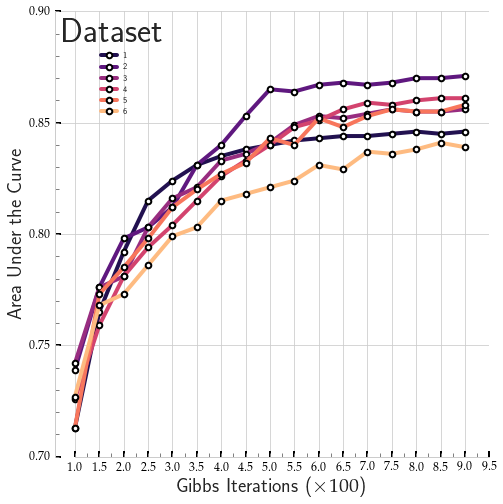

In [81]:
# sb.set_style('ticks')
g = sb.FacetGrid(
    gibbs,
    sharey=True,
    hue='Dataset',
    palette=sb.mpl_palette("magma", 6),  # sequential color palette
    aspect=1,
    legend_out=False,
    size=8)
axs = g.axes

g.map(
    sb.plt.plot,
    'Iterations',
    'AUC',
    linewidth=4,
    marker='o',
    mfc='w',
    mec='k',
    mew=2).set(
        xticks=np.arange(1, 10, 0.5), ylim=[0.7, 0.9],
        yticks=np.arange(0.7, 0.9, 0.05))

# g.ax.set_ylim([0.7, 0.90])
g.ax.set_yticks(np.arange(0.7, 0.9, 0.01), minor=True)
g.ax.set_xticks(np.arange(1, 9.5, 0.25), minor=True)


g.set_ylabels(r'Area Under the Curve', fontsize=20)
g.set_xlabels(r"Gibbs Iterations ($\times 100$)", fontsize=20)
20
g.ax.tick_params(
    direction='in', length=6, width=2, colors='k', which='major', labelsize=12)
g.ax.tick_params(
    direction='in', length=4, width=1, colors='gray', which='minor', labelsize=12)

g.add_legend()
g.despine(trim=10)

sb.plt.tight_layout()
g.savefig("gibbs.pdf")


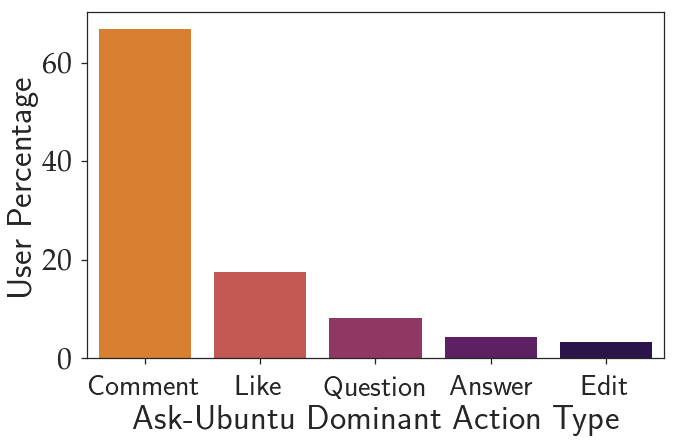

In [45]:
x = [0.032580157530432016, 0.04248548014957435, 0.08123160155939216, 0.175431617471557, 0.6682711432890445]
x = [100*y for y in x]
y = ["Edit", "Answer", "Question", "Like", "Comment"]
x = list(reversed(x))
y = list(reversed(y))
# ax = sb.barplot(y,x,palette="magma",saturation=1)
sb.set_context(rc={"font.size":40,"axes.titlesize":40,"axes.labelsize":40}) 
g = sb.barplot(
    y,
    x,
    palette=list(reversed(sb.mpl_palette("inferno", 6)))[1:],  # sequential color palette
    )
axs = g.axes
axs.set_ylabel('User Percentage',size=35)
axs.set_xlabel('Ask-Ubuntu Dominant Action Type',size=35)
g.tick_params(labelsize=30)
# g.map(
#     sb.plt.plot,
#     'Dominant Behavior',
#     'User Fraction',
#     linewidth=4,
#     marker='o',
#     mfc='w',
#     mec='k',
#     mew=2).set(
#         xticks=np.arange(1, 10, 0.5), ylim=[0.7, 0.9],
#         yticks=np.arange(0.7, 0.9, 0.05))

# # g.ax.set_ylim([0.7, 0.90])
# g.ax.set_yticks(np.arange(0.7, 0.9, 0.01), minor=True)
# g.ax.set_xticks(np.arange(1, 9.5, 0.25), minor=True)


# g.set_ylabels(r'Area Under the Curve', fontsize=20)
# g.set_xlabels(r"Gibbs Iterations ($\times 100$)", fontsize=20)
# 20
# g.ax.tick_params(
#     direction='in', length=6, width=2, colors='k', which='major', labelsize=12)
# g.ax.tick_params(
#     direction='in', length=4, width=1, colors='gray', which='minor', labelsize=12)

# g.add_legend()
# g.despine(trim=10)

sb.plt.tight_layout()
fig = g.get_figure()
axs.grid(False)
fig.savefig("activity_skew.pdf")


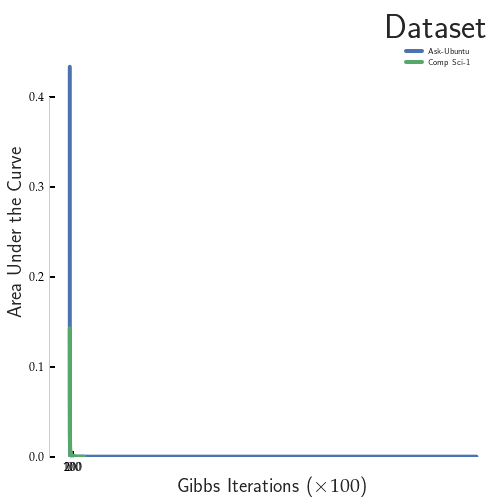

In [168]:
# sb.set_style('ticks')
import math
filename = 'interaction_count.csv'
temporal_presence = pd.read_csv(
    filename,
    header=None,
    names=['Dataset', 'Interactions', 'Fraction of users'],
    dtype={
        'Dataset': 'string',
        'Iterations': 'int32',
        'AUC': 'float64'
    }
)
g = sb.FacetGrid(
    temporal_presence,
    sharey=True,
    hue='Dataset',
    #palette=sb.mpl_palette("magma", 6),  # sequential color palette
    aspect=1,
    legend_out=False,
    size=8)
axs = g.axes

g.map(
    sb.plt.plot,
    'Interactions',
    'Fraction of users',
    linewidth=4,
    marker='',
    mfc='w',
    mec='k',
    mew=2).set(
        xticks=np.arange(0, 300, 100), ylim=[0, 0.5],
        yticks=np.arange(0, 0.5, 0.1))

# g.map(
#     sb.plt.plot,
#     'logWeeks',
#     'logFrac',
#     linewidth=4,
#     marker='',
#     mfc='w',
#     mec='k',
#     mew=2).set(
#         xticks=np.arange(0, 5, 0.5), ylim=[-6, 0],
#         yticks=np.arange(-6, 0, 0.1))
# g.ax.set_ylim([0.7, 0.90])
# g.ax.set_yticks(np.arange(0.7, 0.9, 0.01), minor=True)
# g.ax.set_xticks(np.arange(1, 9.5, 0.25), minor=True)
g.ax.grid(False)

g.set_ylabels(r'Area Under the Curve', fontsize=20)
g.set_xlabels(r"Gibbs Iterations ($\times 100$)", fontsize=20)
20
g.ax.tick_params(
    direction='in', length=6, width=2, colors='k', which='major', labelsize=12)
g.ax.tick_params(
    direction='in', length=4, width=1, colors='gray', which='minor', labelsize=12)

g.add_legend()
g.despine(trim=10)

sb.plt.tight_layout()


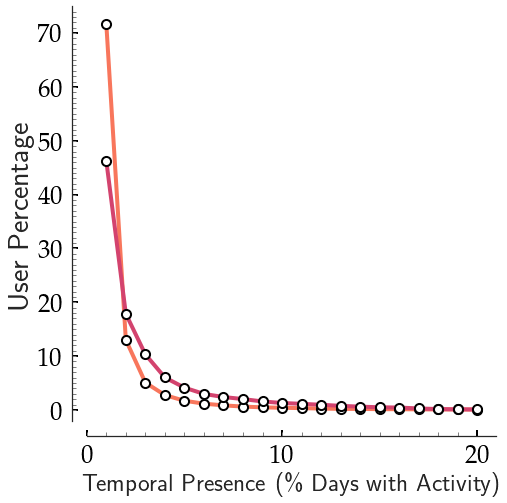

In [53]:
import math
filename = 'temporal_presence_reduced.csv'
temporal_presence = pd.read_csv(
    filename,
    header=None,
    names=['Dataset', 'Weeks', 'Fraction of users', 'logWeeks', 'logFrac','percent'],
    dtype={
        'Dataset': 'string',
        'Iterations': 'int32',
        'AUC': 'float64'
    }
)
g = sb.FacetGrid(
    temporal_presence,
    sharey=True,
    hue='Dataset',
    palette=list(reversed(sb.mpl_palette("magma", 6)))[1:3],  # sequential color palette
    aspect=1,
    legend_out=False,
    size=8)
axs = g.axes

g.map(
    sb.plt.plot,
    'Weeks',
    'percent',
    linewidth=4,
    marker='o',
    mfc='w',
    mec='k',
    mew=2).set(
        xticks=np.arange(0, 22, 10), ylim=[-2, 75],
        yticks=np.arange(0, 75, 10))

# g.ax.set_ylim([0.7, 0.90])
g.ax.set_yticks(np.arange(0, 75, 1), minor=True)
g.ax.set_xticks(np.arange(0, 20, 1), minor=True)
g.ax.grid(False)

g.set_ylabels(r'User Percentage', fontsize=30)
g.set_xlabels(r"Temporal Presence (\% Days with Activity)", fontsize=25)
20
g.ax.tick_params(
    direction='in', length=6, width=2, colors='k', which='major', labelsize=25)
g.ax.tick_params(
    direction='in', length=4, width=1, colors='gray', which='minor', labelsize=25)
g.despine(offset = 15)
#g.add_legend(fontsize=24)


sb.plt.tight_layout()
g.savefig('temporal_presence.pdf')

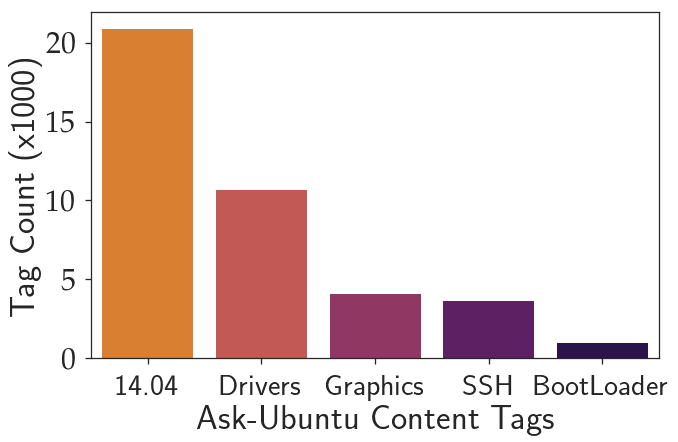

In [46]:
x = [0.032580157530432016, 0.04248548014957435, 0.08123160155939216, 0.175431617471557, 0.6682711432890445]
x = [20.879,10.631,4.054,3.592,.938]
y = ["14.04","Drivers","Graphics", "SSH", "BootLoader"]
# ax = sb.barplot(y,x,palette="magma",saturation=1)
sb.set_context(rc={"font.size":40,"axes.titlesize":40,"axes.labelsize":40}) 
g = sb.barplot(
    y,
    x,
    palette=list(reversed(sb.mpl_palette("inferno", 6)))[1:],  # sequential color palette
    )
axs = g.axes
axs.set_ylabel('Tag Count (x1000)',size=35)
axs.set_xlabel('Ask-Ubuntu Content Tags',size=35)
g.tick_params(labelsize=30)
# g.map(
#     sb.plt.plot,
#     'Dominant Behavior',
#     'User Fraction',
#     linewidth=4,
#     marker='o',
#     mfc='w',
#     mec='k',
#     mew=2).set(
#         xticks=np.arange(1, 10, 0.5), ylim=[0.7, 0.9],
#         yticks=np.arange(0.7, 0.9, 0.05))

# # g.ax.set_ylim([0.7, 0.90])
# g.ax.set_yticks(np.arange(0.7, 0.9, 0.01), minor=True)
# g.ax.set_xticks(np.arange(1, 9.5, 0.25), minor=True)


# g.set_ylabels(r'Area Under the Curve', fontsize=20)
# g.set_xlabels(r"Gibbs Iterations ($\times 100$)", fontsize=20)
# 20
# g.ax.tick_params(
#     direction='in', length=6, width=2, colors='k', which='major', labelsize=12)
# g.ax.tick_params(
#     direction='in', length=4, width=1, colors='gray', which='minor', labelsize=12)

# g.add_legend()
# g.despine(trim=10)
axs.grid(False)
sb.plt.tight_layout()
fig = g.get_figure()
fig.savefig("content_skew.pdf")

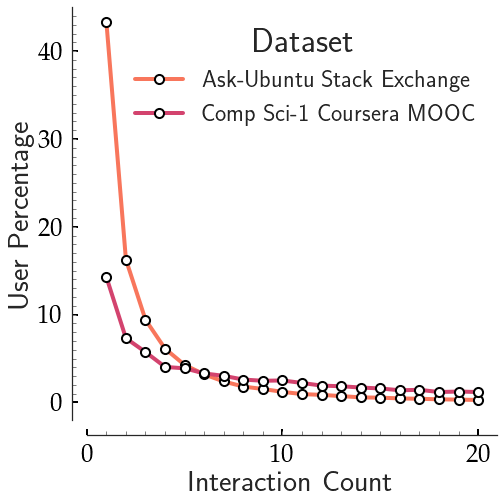

In [52]:
import math
filename = 'interaction_count_reduced.csv'
temporal_presence = pd.read_csv(
    filename,
    header=None,
    names=['Dataset', 'Interactions', 'Fraction of users', 'percent'],
    dtype={
        'Dataset': 'string',
        'Iterations': 'int32',
        'AUC': 'float64'
    }
)
g = sb.FacetGrid(
    temporal_presence,
    sharey=True,
    hue='Dataset',
    palette=list(reversed(sb.mpl_palette("magma", 6)))[1:3],  # sequential color palette
    aspect=1,
    legend_out=False,
    size=8)
axs = g.axes

g.map(
    sb.plt.plot,
    'Interactions',
    'percent',
    linewidth=4,
    marker='o',
    mfc='w',
    mec='k',
    mew=2).set(
        xticks=np.arange(0, 22, 10), ylim=[-2, 45],
        yticks=np.arange(0, 45, 10))

# g.ax.set_ylim([0.7, 0.90])
# g.ax.set_yticks(np.arange(0.7, 0.9, 0.01), minor=True)
# g.ax.set_xticks(np.arange(1, 9.5, 0.25), minor=True)
g.ax.set_yticks(np.arange(1, 45, 1), minor=True)
g.ax.set_xticks(np.arange(1, 20, 1), minor=True)
g.ax.grid(False)

g.set_ylabels(r'User Percentage', fontsize=30)
g.set_xlabels(r'Interaction Count', fontsize=30)
g.ax.tick_params(
    direction='in', length=6, width=2, colors='k', which='major', labelsize=25)
g.ax.tick_params(
    direction='in', length=4, width=1, colors='gray', which='minor', labelsize=25)
g.add_legend(fontsize=24)
g.despine(offset=15)




sb.plt.tight_layout()
g.savefig('interaction_count.pdf')